In [383]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os


In [384]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)

C:\Users\turks\OneDrive\Masaüstü\Capstone Project\Notebook


In [385]:
df.shape

(223, 23)

In [386]:
columns_to_drop = ["dropout_rate_pct","still_in_school_pct","in_district_expenditures",
                   'non_grad_completers_pct', 'hs_equivalency_pct',
    "overall_classification_Not requiring assistance or intervention",
    "overall_classification_Requiring assistance or intervention",
    "reason_for_classification_In need of broad/comprehensive support",
    "reason_for_classification_In need of focused/targeted support",
    "reason_for_classification_Limited or no progress toward targets",
    "reason_for_classification_Meeting or exceeding targets",
    "reason_for_classification_Moderate progress toward targets",
    "reason_for_classification_Substantial progress toward targets"
]

## ET

In [387]:
# drop the columns_to_drop from df dataset
df = df.drop(columns=columns_to_drop)


In [388]:
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,10.2,81.3,34325.0,17.296413,36.90


In [389]:
#find duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()].tolist()
if duplicate_columns:
    print("Duplicate columns found:", duplicate_columns)
else:
    print("No duplicate columns found.")
    

No duplicate columns found.


In [390]:
df.columns, df.shape

(Index(['english_learners_pct', 'students_with_disabilities_pct',
        'progress_toward_improvement_targets_pct',
        'in_district_expenditures_per_pupil', 'graduation_rate_pct',
        'student_teacher_ratio', 'experienced_teachers_pct',
        'DOR_income_per_capita', 'log_in_district_expenditures',
        'needs_income_avg_pct'],
       dtype='object'),
 (223, 10))

In [391]:
df.dtypes

english_learners_pct                       float64
students_with_disabilities_pct             float64
progress_toward_improvement_targets_pct      int64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
DOR_income_per_capita                      float64
log_in_district_expenditures               float64
needs_income_avg_pct                       float64
dtype: object

In [392]:
#find the schools name Weston and NorthBrookfield
df[df.index.isin(['Weston', 'North Brookfield'])]

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
North Brookfield,5.0,24.6,15,20008.84,66.7,10.8,74.7,30230.0,15.985920,57.20
Weston,3.3,17.2,86,29581.26,95.0,11.9,82.6,333105.0,17.904114,17.75


In [393]:
#Drop these 2 rows 
df = df.drop(index=['Weston', 'North Brookfield'])

In [394]:
df.shape

(221, 10)

#### create logit transformation of graduation_rate_pct
p = df['graduation_rate_pct'] / 100

eps = 1e-6  # to avoid division by zero when p=0 or 1
df['logit_graduation_rate_pct'] = np.log((p.clip(eps, 1-eps)) / (1 - p.clip(eps, 1-eps)))

#### drop graduation_rate_pct column
df = df.drop(columns=['graduation_rate_pct'])

In [395]:
df.columns

Index(['english_learners_pct', 'students_with_disabilities_pct',
       'progress_toward_improvement_targets_pct',
       'in_district_expenditures_per_pupil', 'graduation_rate_pct',
       'student_teacher_ratio', 'experienced_teachers_pct',
       'DOR_income_per_capita', 'log_in_district_expenditures',
       'needs_income_avg_pct'],
      dtype='object')

In [396]:
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,10.2,81.3,34325.0,17.296413,36.90


In [397]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['graduation_rate_pct'])
y = df['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (176, 9)
X_test shape: (45, 9)
y_train shape: (176,)
y_test shape: (45,)


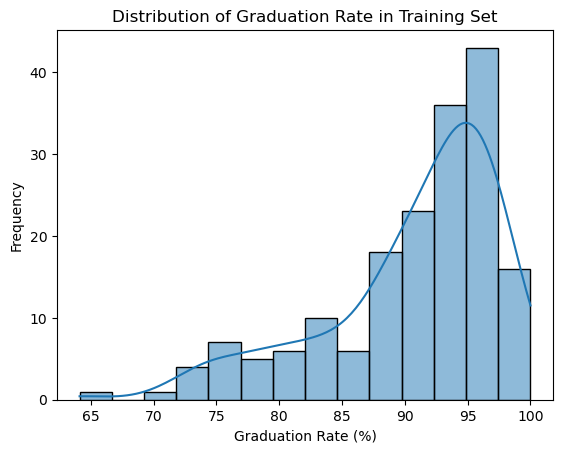

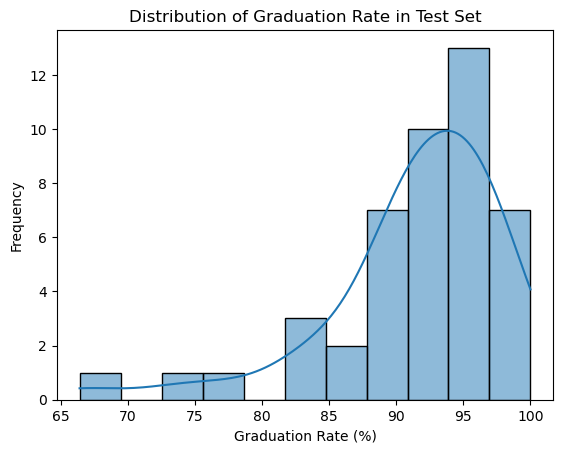

In [398]:
#check the datas if normally distributed

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

#### Importing the StandardScaler for feature scaling

In [399]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Print the first few rows of the scaled training data
X_train_scaled.head()



,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,
Winthrop,0.279460,-1.010122,0.158734,-0.942874,0.698806,-1.549542,-0.436992,-0.590673,0.196956
Masconomet,-0.795053,0.224900,0.388198,0.891790,-0.133143,1.181490,0.958295,-0.469751,-1.251717
North Adams,-0.725729,1.645176,-0.587024,1.084742,-1.658384,-1.032860,-1.030252,-0.733176,1.736172
Middleborough,-0.552421,-0.145606,-1.160684,-0.465801,1.461426,0.325275,-0.551624,0.094778,0.204945
Quincy,1.076679,0.348403,0.158734,-0.357807,0.976122,-0.161882,-0.442582,1.600840,0.852055


#### Checking the Cross validation scores and fitting the models to our train dataset

In [400]:
# Create RandomForestRegressor model by using Crossvalidation


# Initialize the model
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model_2, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
rf_cv_scores = -rf_cv_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))

Cross-validation MSE scores: [16.72092747 20.24074003 17.87707817 12.96840994 17.93683746]
Mean MSE: 17.14879861444441
Standard Deviation of MSE: 2.3820252391189833


#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2

In [401]:
#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2
# Fit the model
rf_model_2.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_rf = rf_model_2.predict(X_train_scaled)

# Training set metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Train R2:", r2_score(y_train, y_train_pred_rf))


Train MSE: 2.534905244318198
Train R2: 0.9482348362093225


In [402]:
#use rf_model_2 to predict the graduation rate for the test set
y_pred_test_rf = rf_model_2.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("Test MSE (RF):", test_mse_rf)
print("Test R2 (RF):", test_r2_rf)

Test MSE (RF): 13.799612088888898
Test R2 (RF): 0.6794596454215867


#### Perform Hyperparamter tuning of Random forest 

In [403]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np


rf_model = RandomForestRegressor(random_state=42)


param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}



random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

#best model
best_rf_model = random_search.best_estimator_

#cross-validation
rf_cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = -rf_cv_scores

print("Best Parameters:", random_search.best_params_)
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Cross-validation MSE scores: [16.95949274 18.68322745 15.95249023 12.69197294 15.0108768 ]
Mean MSE: 15.859612033716592
Standard Deviation of MSE: 1.9972709824415062


In [404]:
# Check metrics for training set
best_rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf_best = best_rf_model.predict(X_train_scaled)

# Training set metrics for best RF model
print("Train MSE (Best RF):", mean_squared_error(y_train, y_train_pred_rf_best))
print("Train R2 (Best RF):", r2_score(y_train, y_train_pred_rf_best))

Train MSE (Best RF): 6.610952942486418
Train R2 (Best RF): 0.8649980851760337


In [405]:
# Using the best_rf_model from the first tunning.

from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred_test = best_rf_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Test MSE:", test_mse)
print("Test R2:", test_r2)

Test MSE: 13.926162838327167
Test R2: 0.6765200974230043


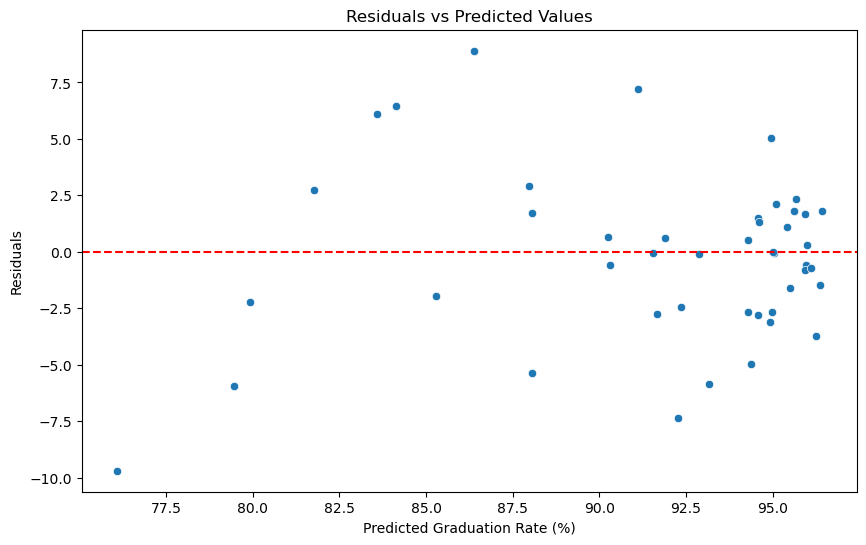

In [406]:
#residuals plot for the best_rf_model
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

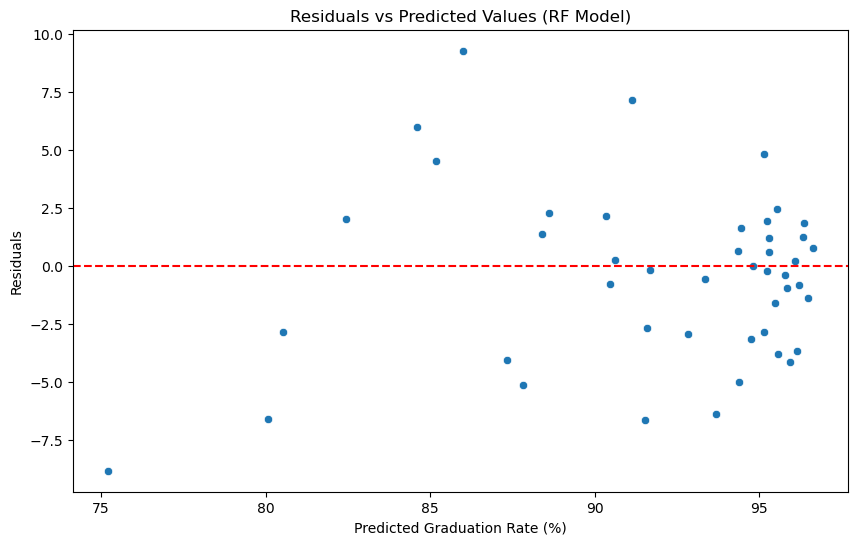

In [407]:
#residuals plot for the rf_model_2
residuals_rf = y_test - y_pred_test_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (RF Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

## XGBOOST MODEL 

#### E.T.

In [408]:
# XGBoost cross-validation
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score 

xgb_model_cv = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_cv_scores = cross_val_score(xgb_model_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
xgb_cv_scores = -xgb_cv_scores

print("XGBoost Cross-validation MSE scores:", xgb_cv_scores)
print("Mean MSE (XGBoost):", np.mean(xgb_cv_scores))
print("Standard Deviation of MSE (XGBoost):", np.std(xgb_cv_scores))

XGBoost Cross-validation MSE scores: [27.20108513 23.09804587 19.39571041 12.95533592 19.49675295]
Mean MSE (XGBoost): 20.429386055591873
Standard Deviation of MSE (XGBoost): 4.706960140935808


In [409]:
# XGBoost model metrics for training set
xgb_model_cv.fit(X_train_scaled, y_train)
y_train_pred_xgb = xgb_model_cv.predict(X_train_scaled) 

# Training set metrics for XGBoost
print("Train MSE (XGBoost):", mean_squared_error(y_train, y_train_pred_xgb))
print("Train R2 (XGBoost):", r2_score(y_train, y_train_pred_xgb))

Train MSE (XGBoost): 9.027582101139514e-07
Train R2 (XGBoost): 0.9999999815648231


In [410]:
# check metrics for test set
y_pred_test_xgb = xgb_model_cv.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

print("Test MSE (XGBoost):", test_mse_xgb)
print("Test R2 (XGBoost):", test_r2_xgb)

Test MSE (XGBoost): 12.265545629249775
Test R2 (XGBoost): 0.715093270754831


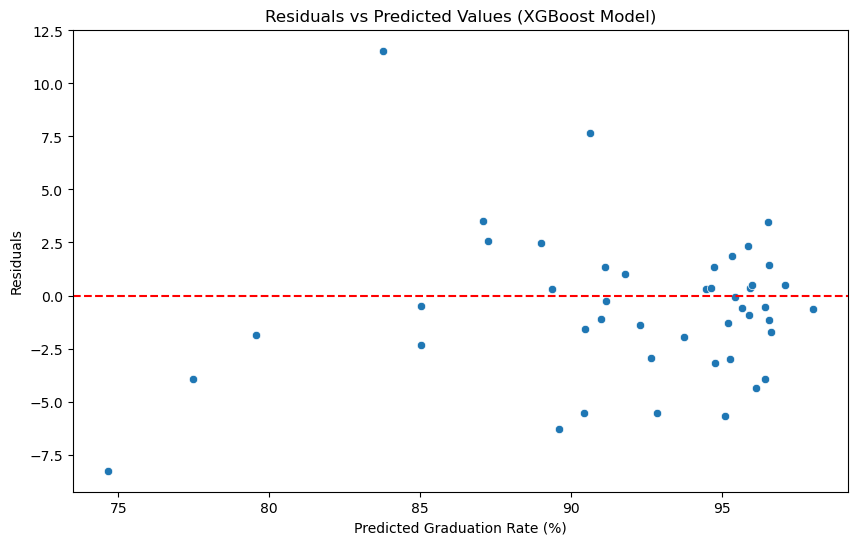

In [411]:
#check residuals for xgboost model
residuals_xgb = y_test - y_pred_test_xgb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_xgb, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (XGBoost Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

### Different Regression Models

##### Support Vector Regression(SVR)

In [412]:
#check SVR model for cross validation
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_cv_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
svr_cv_scores = -svr_cv_scores

print("SVR Cross-validation MSE scores:", svr_cv_scores)
print("Mean MSE (SVR):", np.mean(svr_cv_scores))
print("Standard Deviation of MSE (SVR):", np.std(svr_cv_scores))

SVR Cross-validation MSE scores: [39.65765664 30.06950472 20.26533655 23.51904392 18.64086031]
Mean MSE (SVR): 26.43048042847091
Standard Deviation of MSE (SVR): 7.685887474836358


In [413]:
#Check svr model metrics for training set
svr_model.fit(X_train_scaled, y_train)
y_train_pred_svr = svr_model.predict(X_train_scaled)

# Training set metrics for SVR
print("Train MSE (SVR):", mean_squared_error(y_train, y_train_pred_svr))
print("Train R2 (SVR):", r2_score(y_train, y_train_pred_svr))

Train MSE (SVR): 21.12222028625674
Train R2 (SVR): 0.5686642744569583


In [414]:
#Create SVR model
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test_svr = svr_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_svr = mean_squared_error(y_test, y_pred_test_svr)
test_r2_svr = r2_score(y_test, y_pred_test_svr)

print("Test MSE (SVR):", test_mse_svr)
print("Test R2 (SVR):", test_r2_svr)


Test MSE (SVR): 23.53471614154744
Test R2 (SVR): 0.4533305568068813


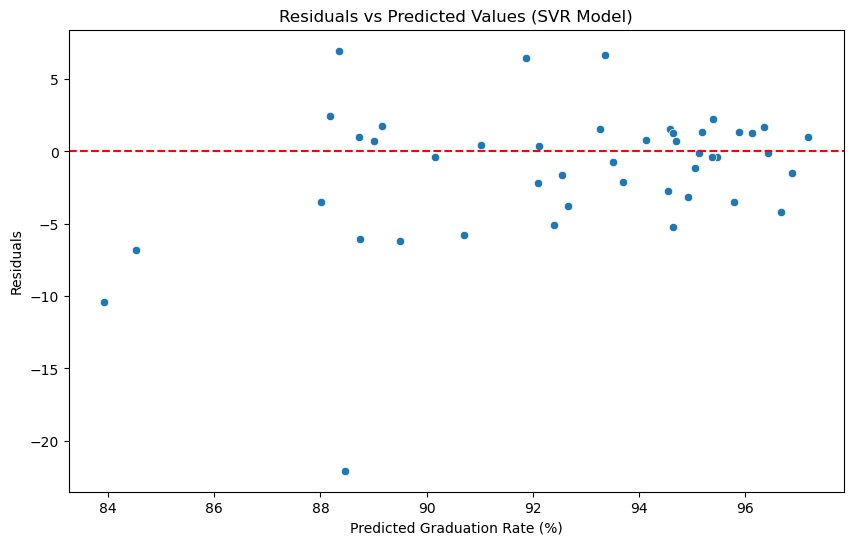

In [415]:
#Residuals plot for the SVR model
residuals_svr = y_test - y_pred_test_svr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_svr, y=residuals_svr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (SVR Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

In [416]:
# !pip install catboost

In [417]:
#check metrics for CatBoost model cross-validation
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost_cv_scores = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
catboost_cv_scores = -catboost_cv_scores

print("CatBoost Cross-validation MSE scores:", catboost_cv_scores)
print("Mean MSE (CatBoost):", np.mean(catboost_cv_scores))
print("Standard Deviation of MSE (CatBoost):", np.std(catboost_cv_scores))

CatBoost Cross-validation MSE scores: [19.67740813 23.08447171 15.93325955 16.35640524 16.2305397 ]
Mean MSE (CatBoost): 18.256416865688717
Standard Deviation of MSE (CatBoost): 2.772746366838874


In [418]:
#check the metrics for catboost model for training set
catboost_model.fit(X_train_scaled, y_train)
y_train_pred_catboost = catboost_model.predict(X_train_scaled)

# Training set metrics for CatBoost
print("Train MSE (CatBoost):", mean_squared_error(y_train, y_train_pred_catboost))
print("Train R2 (CatBoost):", r2_score(y_train, y_train_pred_catboost))

Train MSE (CatBoost): 2.8250906342440056e-06
Train R2 (CatBoost): 0.9999999423089759


In [419]:
#Check the metrics for catboost model for test set
y_pred_test_catboost = catboost_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_catboost = mean_squared_error(y_test, y_pred_test_catboost)
test_r2_catboost = r2_score(y_test, y_pred_test_catboost)

print("Test MSE (CatBoost):", test_mse_catboost)
print("Test R2 (CatBoost):", test_r2_catboost)

Test MSE (CatBoost): 12.513514213776878
Test R2 (CatBoost): 0.7093334031950302


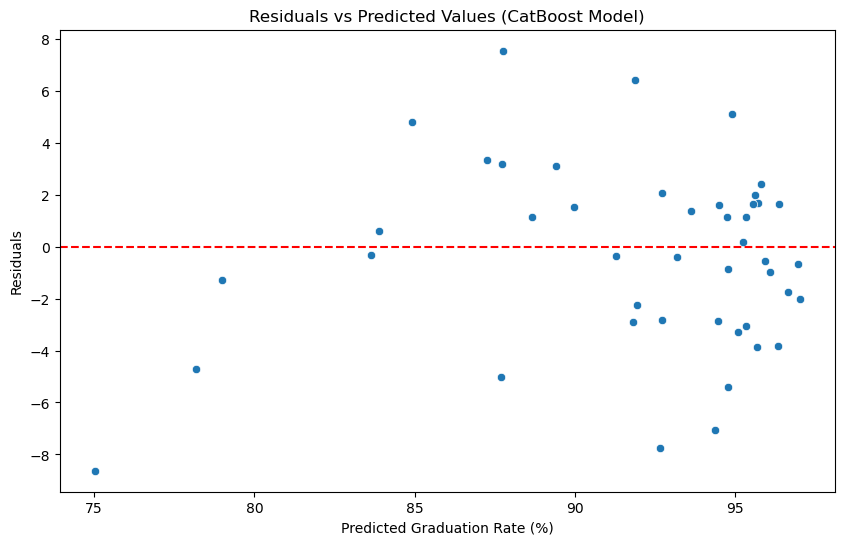

In [420]:
# residuals plot for the CatBoost model
residuals_catboost = y_test - y_pred_test_catboost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_catboost, y=residuals_catboost)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (CatBoost Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()